#Case Study 3 : Data Science Hackathon on Yelp Data
** Due Date: November 11, before the class**
<a href="http://www.thesocialnetwork-movie.com/"> <img src="http://www.eldia.es/blogs/bitacora/wp-content/uploads/2012/09/social-network-window.jpeg" width="500px"> </a>


*------------

In this project, your goal is to design a better service/solution for Yelp.
* Your team needs to decide which businese problem is important for the customers/businese entities in Yelp website.
* Then design a data science approach to improve one of the current services of Yelp or design a new service for Yelp.
* The solution should include all the three components of data science: 1) the businese part to analyze the potential impact of your new/improved service; 2) the mathimatical part to formulate the problem and develop math solution; 3) the programming part to collect the data, implement the math solution, and optionally launch the prototype service demo.


# Background about Data Hackathon and Yelp Data

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo("bLsM1z8lX_A") 

In [4]:
YouTubeVideo("fAvW27iEwS4")



**Optional Readings:** 
* Yelp API: https://www.yelp.com/developers/documentation/v2/search_api
* Python with Yelp API: http://letstalkdata.com/2014/02/how-to-use-the-yelp-api-in-python/
* Yelp API Python code sample: https://github.com/Yelp/yelp-api/tree/master/v2/python
* Text data analysis: http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html


** Python libraries you may want to use:**
* Scikit-learn (http://scikit-learn.org): machine learning tools in Python.

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

#Problem 1: the Businese Problem (10 points)
 As a group, learn about the Yelp website and research about the current services of Yelp: such as  search/ranking of business entities, user ratings, location-based search, and so on.
 Pick one of the current services for further consideration, or design a new service for Yelp which you believe to be important for Yelp. 
Define precisely in the report and briefly in the cells below, what is the businese problem that your team wants to solve.
Why the problem is important to solve? 
Why you believe you could provide a better solution with data science.

For example, a businese problem I may choose is: how to provide a better search service (i.e., a better ranking of the businese entities) on Yelp, so that users can search Yelp and get better ranking results of the different businese entities.

**Please describe here *briefly*  (please edit this cell)**

1) Your business problem to solve:

We are looking to solve the problem taking into consideration
- Business Entity
- User experience
- Yelp Impact

A new "Trending" service on the yelp can provide a substantial impact on all these three. The complete elaboration of the solution is below.

2) Why the problem is important to solve? 

Present Scenario - A new entrant in the market finds it really difficult to crack it's way into the list of top 10 or 20. So, its presence on yelp is greatly affected and a new business has got minimum visibility on the yelp website. On the user side, there is no section which showcases the new & trending places in their city.

Solution - By adding a trending feature we are trying to encourage new business entities from various categories to enter the limelight of Yelp website. Also, users who see the same list of top restaurants get to view new and upcoming venues where they can try out and it can get them excited about new places. Finally, on the yelp side of business, it encourages new market entrants to join them and enhance its portfolio by getting the latest market trends or buzzing places and more user presence.


3) How could you provide a better solution with data science.

Data Science can read through all the reviews, business ids, location, categories, etc. There is a huge volume of data (1.6 GB in Yelp Challenge Dataset) that if trying to do manual will take year to find and formulate a result or test a given hypothesis.

Using Data Science tools & techniques we can filter the data, apply mathematical models, filter the unwanted and come out with a clean & sorted outcomes. Also, we can compare and try various approaches to solve our problems in very less amount of time.






#Problem 2: Data Collection and Cleaning (10 points)

* Your team should decide where and how to collect a set of data online that is relevant to the businese question you chose in Problem 1. 
* One example is that you could download the Yelp Dataset from  http://www.yelp.com/dataset_challenge (Click "Get the Data", and register to get data). NOTE: the whole dataset can be too big for your computer. You may not need to use all the data records. 
* Another example is to use Yelp API (https://www.yelp.com/developers/documentation/v2/search_api) and write Python code to collect relevant data, just like what we did in Case study 1 with Twitter API.

In [1]:
import json

path = "yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_business.json"
handle = open(path)

business = [ json.loads(line) for line in handle]

In [2]:
'Pizza' in [i for i in business if i['business_id'] == 'x5Mv61CnZLohZWxfCVCPTQ'][0]['categories']

True

In [3]:
business_phx = [ i for i in business if i['city'] == 'Phoenix' and 'Pizza' in i['categories']]

In [4]:
id_names = {}
for i in business_phx:
    id_names[i['business_id']] = [j['name'] for j in business_phx if j['business_id'] == i['business_id']]
id_names

{u'-AAig9FG0s8gYE4f8GfowQ': [u'Pane Bianco'],
 u'-KZA7UoULw_pM3jBBUzb8A': [u'Sardellas Pizza and Wings'],
 u'-S7aL8dVIiXjCdbTZVn8uA': [u'Manhattan Pizzeria and Subshop'],
 u'-f5EhKQb7jPtDl1eYDwV0w': [u"Domino's Pizza"],
 u'-yzl8Zm-MmSqx31VN7vB0Q': [u"Corleone's"],
 u'08In-bFs8JOmSTDlQ0BfFw': [u"Chuck E Cheese's Pizza"],
 u'0BXtWaDWN6Lh7T8mbbZniw': [u'Pizza & Krispy Krunchy Chicken'],
 u'0gQrhOYWdO0XVZEKtOrvaA': [u'Red Devil'],
 u'0ieEqGInYunNBaBzg8j_WQ': [u'Slices'],
 u'0vb_YDCtZo0Yk9zHF7rzSA': [u'Pizza Hut'],
 u'1-40wS09HcJnJIKRVWRL6g': [u'Pizza Patron'],
 u'1_JEa6MI0xl_wlY4gqMHqw': [u'Giant Rustic Pizza'],
 u'2J1DtN7FjGICQcgRei3jKA': [u'Peter Piper Pizza'],
 u'2OZtiGEvLfAjfhC18m9Djw': [u'Nypd Pizza'],
 u'2VpSPb8IVXNqyVY5n7caGg': [u'ASAP California Pizza Kitchen'],
 u'2bFBzziB3_yTGYcUerd9nw': [u'Pizza Hut'],
 u'38G8LPiqECn_P6LQfUnfZA': [u'Ristorante Paesano'],
 u'3Df6ICj0rHROVH4xUlb7Yw': [u"Papa John's Pizza"],
 u'3E2j2avZJjNKCeWZIGZYTw': [u"Domino's Pizza"],
 u'3FhHnU7Mq8KcyWiWKH0RzA

In [5]:
path = "yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_review.json"
handle = open(path)

review = [ json.loads(line) for line in handle]

In [6]:
business_id = [ i['business_id'] for i in business_phx]
review_phx = []
for i in review:
    if i['business_id'] in business_id:
        i['name'] = id_names[i['business_id']][0]
        review_phx.append(i)

In [7]:
review_phx[0]

{u'business_id': u'x5Mv61CnZLohZWxfCVCPTQ',
 u'date': u'2010-04-02',
 'name': u"Domino's Pizza",
 u'review_id': u'4ibY4fPQYM7FBSVPrvrYvg',
 u'stars': 4,
 u'text': u"Not the same Domino's pizza I ate too much of in College. Vastly different and a major improvement! Ordering on-line couldn't be easier, and pizza was made exactly how I ordered. Piping hot, flavorful, better than average crust, nicely blackened in all the right spots, tasty toppings, robust sauce. Friendly delivery by John. Price is fair. Much, much better than Pizza Hut!",
 u'type': u'review',
 u'user_id': u't95D1tnWvAOy2sxXnI3GUA',
 u'votes': {u'cool': 0, u'funny': 0, u'useful': 0}}

In [8]:
with open('review_phx_pizza.json', 'w') as outfile:
    json.dump(review_phx, outfile)

#Problem 3: Math Problem Formulation and Solution (20 points)

Define the businese problem as a math problem and design a math solution to the problem.

**For example**, the ranking problem that I chose in Problem 1 can be translated to a math problem of estimating the scores of different businese entities.
A math solution could be the <a href="https://en.wikipedia.org/wiki/Elo_rating_system">Elo rating system</a>, which is used in Facemash.com.
When
The equations are:

The expected probability for businese $A$ to win a competition against $B$ can be defined as:
$$ E_A = \frac{1}{1 + 10^{(R_B - R_A)/400} } $$
A *competition* can be an event when a customer visited both businese entities (e.g. restaurants), and gives ratings to both entities.
Suppose a customer gives two ratings for $A$ and $B$. If his/her rating for $A$ is higher than his/her rating for $B$, we can say $A$ **win**. If lower, **loss**. If the ratings are the same, **tie**.

The score of the businese entities can be estimated/updated by 
$$ R_A' = R_A - K(S_A-E_A)$$

**Another example solution** could be using PageRank to rank different reviewers. We can then give different weights on the reviews from different users. We could choose to trust more on the reviews provided by important users (with large PageRank scores). Then instead of ranking the businese entities by simple averaging of the user ratings, we can rank the businese entities by the average ratings **weighted** by users' PageRank scores.

**Insert your answers here**


This "Trending New" Problem can be translated to a math problem of estimating the scores of different 
Pizza Restaurants. There does not to be any available math solutions to this kind of problem, and we plan to do some sort of unsupervised learning.

We came up three models in the end. 

As for model 1, we filtered out all restaurant that opened more than a year ago, and calculate the average ratings of the remaining restaurants during time window for ranking.
           

As for model 2, we assume that old restaurants' ratings , no matter how high their average rating was, will tend to stay stable in the time window. Promising new restaurants should stand out by a large increase in ratings and volume. Therefore, we propose the second model that measures how much a restaurant has improved in the time window than previous.

Lastly, model 3 penalizes old stores to a greater degree as compared to the model 2. In this approach , we took into account all reviews inside the time window, but the final rating is multiplied by a constant factor lambda that is to the power of L, which is Open days divided by the window length.

All Three formulas are included in the final group report.



*------------------------

#Problem 4: Implement the Algorithm and Explore the Data  (20 points)


* Based upon the above math solution, implement the algorithm in python and run the algorithm on your data.
* Show the results, using figures or tables


In [9]:
#Rank Method 1
# load the data
import json
business_phx = json.load(open("review_phx_pizza.json"))

In [10]:
business_phx[0]

{u'business_id': u'x5Mv61CnZLohZWxfCVCPTQ',
 u'date': u'2010-04-02',
 u'name': u"Domino's Pizza",
 u'review_id': u'4ibY4fPQYM7FBSVPrvrYvg',
 u'stars': 4,
 u'text': u"Not the same Domino's pizza I ate too much of in College. Vastly different and a major improvement! Ordering on-line couldn't be easier, and pizza was made exactly how I ordered. Piping hot, flavorful, better than average crust, nicely blackened in all the right spots, tasty toppings, robust sauce. Friendly delivery by John. Price is fair. Much, much better than Pizza Hut!",
 u'type': u'review',
 u'user_id': u't95D1tnWvAOy2sxXnI3GUA',
 u'votes': {u'cool': 0, u'funny': 0, u'useful': 0}}

In [11]:
import pandas as pd
import numpy as np

#extract the attribus needed
phx_data = [[i["business_id"], i["name"], i["date"], i["stars"]] for i in business_phx]

In [12]:
phx_data[0]

[u'x5Mv61CnZLohZWxfCVCPTQ', u"Domino's Pizza", u'2010-04-02', 4]

In [14]:
data = pd.DataFrame(phx_data, columns=["business_id", "name", "date", "stars"])
data.head()

,business_id,name,date,stars
0,x5Mv61CnZLohZWxfCVCPTQ,Domino's Pizza,2010-04-02,4
1,x5Mv61CnZLohZWxfCVCPTQ,Domino's Pizza,2010-05-03,4
2,x5Mv61CnZLohZWxfCVCPTQ,Domino's Pizza,2010-11-02,5
3,x5Mv61CnZLohZWxfCVCPTQ,Domino's Pizza,2011-06-17,2
4,x5Mv61CnZLohZWxfCVCPTQ,Domino's Pizza,2012-09-04,3


In [16]:
#sort reviews by date
data = data.sort(["date"], ascending=True)
# reassign the index
data.index = range(0, len(data))
data.tail(10)

,business_id,name,date,stars
17180,oc0Wl6ktfMLb5VZ2Uz6M2A,Vincent Market Bistro,2015-01-08,5
17181,k8JnZBspVOI8kLcQek-Chw,Mamma Mia Brick Oven Pizza & Pasta,2015-01-08,1
17182,ML1RJdeZ7bbfMrHvJ7m99A,Oregano's Pizza Bistro,2015-01-08,5
17183,ZRJwVLyzEJq1VAihDhYiow,Spinato's Pizzeria,2015-01-08,5
17184,QkyN2vqQidQhotvOtPIrkw,Humble Pie,2015-01-08,5
17185,CSoURupWEyuyzkjMOExKPg,North Italia,2015-01-08,5
17186,dKtbrGgg5fbl8MibhilP2A,La Grande Orange,2015-01-08,4
17187,XfVGU6WGZKc867spn2TImw,Pomo Pizzeria Napoletana - Phoenix,2015-01-08,4
17188,93fEJZYc3B-jOMaXce7G5A,Fired Pie,2015-01-08,2
17189,1_JEa6MI0xl_wlY4gqMHqw,Giant Rustic Pizza,2015-01-08,3


In [17]:
#define a function to get the days each restaurant lasted
import time, datetime
def timeOfRes(date):
    start_date = time.mktime(datetime.datetime.strptime(min(date), "%Y-%m-%d").timetuple())
    end_date = time.mktime(datetime.datetime.strptime(max(date), "%Y-%m-%d").timetuple())
    lastDays = round((end_date-start_date)/(3600*24))
    return lastDays

In [18]:
#test the goupby method
groudedData = data.groupby(["business_id", "name"])["date"].count()

groudedData.head()

business_id             name                          
-AAig9FG0s8gYE4f8GfowQ  Pane Bianco                       362
-KZA7UoULw_pM3jBBUzb8A  Sardellas Pizza and Wings          20
-S7aL8dVIiXjCdbTZVn8uA  Manhattan Pizzeria and Subshop     16
-f5EhKQb7jPtDl1eYDwV0w  Domino's Pizza                      7
-yzl8Zm-MmSqx31VN7vB0Q  Corleone's                        106
Name: date, dtype: int64

In [21]:
#get all the distinct businessIds
ids = groudedData.index.levels[0]

In [22]:
#get {business_id: lastDays}
business_last = {}
for i in ids:
    last = timeOfRes(data[data["business_id"]==i]["date"])
    business_last[i] = last

In [23]:
# add a column "lastDays", and assign default value 0
data["lastDays"] = 0

In [24]:
# update lastDays with business_last
for i in ids:
    data.loc[data["business_id"]==i, "lastDays"] = business_last[i] 

In [25]:
data.head(20)

,business_id,name,date,stars,lastDays
0,VVeogjZya58oiTxK7qUjAQ,Pizzeria Bianco,2005-03-08,5,3593
1,VVeogjZya58oiTxK7qUjAQ,Pizzeria Bianco,2005-04-08,5,3593
2,r-8wS4RTfRJtWM0DvdaCtQ,Peter Piper Pizza,2005-04-14,5,3293
3,VVeogjZya58oiTxK7qUjAQ,Pizzeria Bianco,2005-07-18,4,3593
4,VVeogjZya58oiTxK7qUjAQ,Pizzeria Bianco,2005-12-15,5,3593
5,r-8wS4RTfRJtWM0DvdaCtQ,Peter Piper Pizza,2006-01-07,1,3293
6,-AAig9FG0s8gYE4f8GfowQ,Pane Bianco,2006-01-11,5,3275
7,VVeogjZya58oiTxK7qUjAQ,Pizzeria Bianco,2006-01-20,3,3593
8,-AAig9FG0s8gYE4f8GfowQ,Pane Bianco,2006-01-20,3,3275
9,MEraJIKYztC7IOzYwMe86g,Raimondo's,2006-01-20,2,2510


In [26]:
# get the rank of mean rating of all the restaurant
# data: original data
# daysFromPresent: the time window, the days from present
import time, datetime
def meanRatingRank(data, daysFromPresent = 30):
    present="2015-01-08" #present could be get from a method
    ts = time.mktime(datetime.datetime.strptime(present, "%Y-%m-%d").timetuple()) - 3600 * 24 * daysFromPresent
    start_date = datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d')
    data_temp = data[data["date"]>=start_date]
    data_group = data_temp.groupby(["business_id","name", "lastDays"])["stars"].mean()
    data_group.sort(["stars"], ascending=False)
    
    return data_group

In [27]:
# get the rank of mean ratings of all restaurants in the past 60 days
ds_grouped = meanRatingRank(data, 60)

In [28]:
#define a function to transfer the series returned by meanRatingRank() to DataFrame
def transSeriesToDf(ds_grouped):
    df_businessId = ds_grouped.index.get_level_values(0)
    df_name = ds_grouped.index.get_level_values(1)
    df_lastDays = ds_grouped.index.get_level_values(2)
    df_stars = list(ds_grouped.values)
    df_mean_data = pd.DataFrame(data = [df_businessId, df_name, df_lastDays, df_stars], index = ["business_id", "name", "lastDays", "stars"]).transpose()
    
    return df_mean_data

In [29]:
df_mean_data = transSeriesToDf(ds_grouped)

In [30]:
#get the rank of restaurants which lasted less than one year
df_mean_data[df_mean_data["lastDays"] <=365]

,business_id,name,lastDays,stars
0,nmo_Kbv1H2eOuXmhB3M6kA,Momenti,293,5
20,z0rbqzkp6JAorvx3rXANYg,Farmhouse Pizza,308,5
29,LsKF7GFQ0j5U1jLMwq0_hQ,Oven and Vine,191,4.6
42,lp-J_cO5owuMzGJqdn3PNg,MOD Pizza,108,4.3
46,aX8xuj7PWFGVqyBN06ysQw,Fired Pie,128,4.25
69,MoMu4FypeaSR27G0qFIc6g,Isa's Pizza,336,4
84,_eymim7Di9WjVOxT4OSnjg,Pizza Studio,283,3.8
89,WiRBzwdzVMDp6JRjWRNaqA,Fired Pie,99,3.75
90,BMjggIgOghBMEXPo8q7q3w,LaBella Pizzeria and Restaurant,181,3.714286
94,77pQVPhksTpz-Yz8v4bK_A,Forge Pizza,85,3.666667


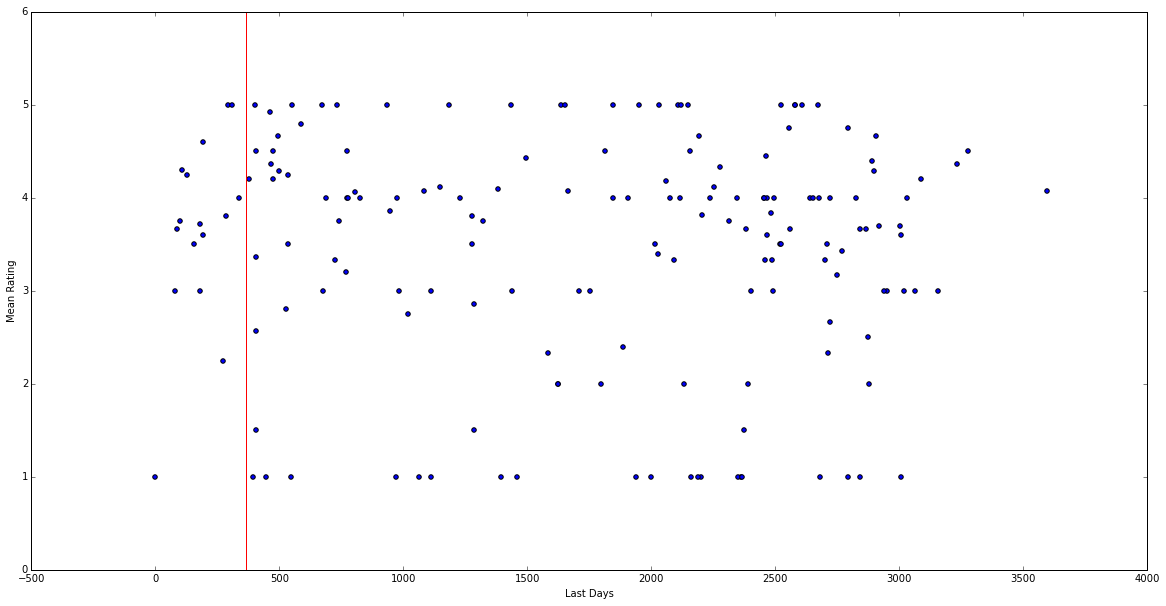

In [31]:
#plot the (lastDays, mean Rating) of all restaurants, and add a line x = 365
import matplotlib.pyplot as plt
%matplotlib inline 
plt.figure(figsize=(20,10))
plt.scatter(df_mean_data["lastDays"], df_mean_data["stars"])
plt.xlabel("Last Days")
plt.ylabel("Mean Rating")
plt.axvline(x=365, color="r")
plt.show()

In [34]:
business = business_phx
def organize_data(data):
    b_ids = {}
    for s in data:
        bid = s['business_id']
        date = s['date']
        stars = s['stars']
        votes = s['votes']
        if b_ids.has_key(bid):
            bidstuff = b_ids[bid]
            bidstuff['reviews'] += [{date:[stars,votes]}]
            bidstuff['name'] = s['name']
            if date < bidstuff['opendate']:
                bidstuff['opendate'] = date
        else:
            b_ids[bid] = {'name':s['name'], 'reviews':[{date:[stars,votes]}],'opendate':date}
    return b_ids

In [35]:
mapped_data = organize_data(business)
ids = [i['business_id'] for i in business]
ids = list(set(ids))

In [36]:
#In this example, we chose to find the trending new pizza restaurants in the last two months.
#Rank Method 2: We focused on how much each store has improved during the window period. In order to filter
# those who have improved little from scratch, we set up a threshold to be 3. That is, only ratings bigger
# than 3 inside the window will be taken into account.
import time,datetime
def rank1(m,ids,window,present):
    ranks = []
    for i in ids:
        reviews = m[i]['reviews']
        ts = time.mktime(datetime.datetime.strptime(present, "%Y-%m-%d").timetuple()) - 3600 * 24 * window
        opents = time.mktime(datetime.datetime.strptime(m[i]['opendate'], "%Y-%m-%d").timetuple())
        length = float(time.mktime(datetime.datetime.strptime(present, "%Y-%m-%d").timetuple()) - opents) / (3600 *24 * window)
        time_of_start = datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d')
        avg = sum([r.values()[0][0] for r in reviews
                   if r.keys()[0] < time_of_start])/float(len(reviews))
        recent = [r.values()[0][0] for r in reviews
                  if r.keys()[0] >= time_of_start]
        bigger = [b for b in recent if b > avg and b > 3]
        if len(recent) > 0 and length != 0:
            ranks += [{'ID':i,'Name':m[i]['name'],'Rating':len(bigger)/(float(len(recent))*length),'Opendate':m[i]['opendate'],'AVG':sum(recent)/len(recent)}]
        else:
            ranks += [{'ID':i,'Name':m[i]['name'],'Rating':0,'Length':len(reviews),'AVG':avg}]
    return ranks

In [38]:
#Get the top 10
from operator import itemgetter
r = rank1(mapped_data,ids,60,'2015-01-15')
#Sort the ranks based on their percentage of improvement
newlist = sorted(r, key=itemgetter('Rating'), reverse=True)
top10 = newlist[:10]
finalRank1 = [(r['Name'],r['Opendate'],r['Rating']) for r in top10]
finalRank1 #Top 10 during period 2014-11-16 to 2015-01-15

[(u'Fired Pie', u'2014-09-30', 0.42039704165044767),
 (u'MOD Pizza', u'2014-09-19', 0.3812213201553124),
 (u'Forge Pizza', u'2014-10-10', 0.30914555603263205),
 (u'Fired Pie', u'2014-08-29', 0.28768354809709323),
 (u"Domino's Pizza", u'2014-09-24', 0.26538886841135273),
 (u'LaBella Pizzeria and Restaurant', u'2014-07-10', 0.25391227683491296),
 (u'Oven and Vine', u'2014-07-01', 0.22722491058278982),
 (u'Momenti', u'2014-03-19', 0.19864808939164022),
 (u'Pizza Studio', u'2014-03-11', 0.19352237602472785),
 (u"Rosati's Pizza", u'2014-08-03', 0.18177227972734158)]

In [39]:
import datetime
#Rank method 2
#Learn the constant factor lambda via validation
#The ranking formula : R(i) = average(R(i) in the window) * lambda ^ L
# R(i) -> Rating for Restaurant i; lambda: penalizing factor for old restaurants; L: how many windows
# are there between the date of measure and its opendate.
#Error Metric 
#How does our ranking result based on the window period matches that of the following short time period?
# Error Formula: MSE(i) is how many restaurants that ranked top 10 are not inside that of the first one
# We aggregate the error of the entire dataset with weights equal to how far each period is to the mindate
# Resulting in a subset of lambdas
# Then we find the best lambda when the overall unweighted error is the minimum.
import numpy
def date_range(s, e, window, validation, step):
    yr = []
    start = datetime.datetime.strptime(s,"%Y-%m-%d") - datetime.timedelta(days=step)
    end = datetime.datetime.strptime(e,"%Y-%m-%d")
    i = 0
    while (start < end):
        start = start + datetime.timedelta(days=step)
        w = start + datetime.timedelta(days=window)
        v = start + datetime.timedelta(days=window+validation)
        yr.append((start.strftime("%Y-%m-%d"),w.strftime("%Y-%m-%d"),v.strftime("%Y-%m-%d")))
    return yr
mindate = '2005-03-08'
maxdate = '2014-11-08'
#Window :60 days; Validation : 20 days; Step: 30 days. So the result will be a list of overlapping time
times = date_range(mindate,maxdate,60,20,30)

def rankb(m,ids,t,l):
    ranks = []
    for i in ids:
        reviews = m[i]['reviews']
        opendate = datetime.datetime.strptime(m[i]['opendate'],"%Y-%m-%d")
        L = (datetime.datetime.strptime(t[0],"%Y-%m-%d") - opendate).days / float(60)
        if (L < 0):
            L = 100000
        recent = [r.values()[0][0] for r in reviews if r.keys()[0] >= t[0] and r.keys()[0] <= t[1] and r.values()[0][0] > 3]
        if len(recent) > 0:
            avg1 = l ** L * sum(recent) / float(len(recent))
        else:
            avg1 = 0
        v = [r.values()[0][0] for r in reviews if r.keys()[0] >= t[1] and r.keys()[0] <= t[2]] # using a small validation set
        if len(v) > 0:
            avg2 = l ** L * sum(v) / float(len(v))
        else:
            avg2 = 0
        ranks.append({'ID':i,'name':mapped_data[i]['name'],'Rating1':avg1,'Rating2': avg2,'Opendate':m[i]['opendate'],'L':L})
        r1 = sorted(ranks, key=itemgetter('Rating1'),reverse = True)[:10]
        r2 = sorted(ranks, key=itemgetter('Rating2'), reverse=True)[:10]
    return (r1,r2)# We just want to verify the top 10

def err(t,l):
    r = rankb(mapped_data,ids,t,l)
    rank1 = r[0]
    rank2 = r[1]
    #Error Calculation
    err = 0;
    rank1ID = [i['ID'] for i in rank1]
    j = 0
    for i in rank2:
        if i['ID'] not in rank1ID:
            err = err + 1
    return err
# It is found that globally weighted error reach minimum when lambda = [0.36,0.40]. So we would discover which resulted 
# in the least un-weighted error
def find_optimal(times,search_span,g):
    lambdas = []
    ls = search_span
    b = 0
    for l in ls:
        total = 99999
        e = 0
        p = 1
        for t in times:
            if (g == 1):
                e = e + err(t,l)* p / 121
            else:
                e = e + err(t,l)
            p = p + 1
        lambdas += [(e,l)]
        if (e < total):
            total = e
            b = l
    return lambdas

In [111]:
#Optimal lambda
ls = find_optimal(times,numpy.arange(0.01,0.99,0.01),1)
ls

[(199, 0.01),
 (199, 0.02),
 (199, 0.029999999999999999),
 (199, 0.040000000000000001),
 (199, 0.050000000000000003),
 (200, 0.060000000000000005),
 (200, 0.069999999999999993),
 (200, 0.080000000000000002),
 (200, 0.089999999999999997),
 (200, 0.099999999999999992),
 (200, 0.11),
 (200, 0.12),
 (200, 0.13),
 (200, 0.14000000000000001),
 (200, 0.15000000000000002),
 (201, 0.16),
 (201, 0.17000000000000001),
 (201, 0.18000000000000002),
 (201, 0.19),
 (201, 0.20000000000000001),
 (202, 0.21000000000000002),
 (202, 0.22),
 (202, 0.23000000000000001),
 (202, 0.24000000000000002),
 (202, 0.25),
 (202, 0.26000000000000001),
 (202, 0.27000000000000002),
 (202, 0.28000000000000003),
 (202, 0.29000000000000004),
 (202, 0.29999999999999999),
 (202, 0.31),
 (202, 0.32000000000000001),
 (202, 0.33000000000000002),
 (202, 0.34000000000000002),
 (202, 0.35000000000000003),
 (202, 0.36000000000000004),
 (202, 0.37),
 (202, 0.38),
 (203, 0.39000000000000001),
 (203, 0.40000000000000002),
 (204, 0.410

In [112]:
#Best is among 0.01 to 0.15
optl=find_optimal(times,numpy.arange(0.01,0.15,0.01),0)
optl

[(481, 0.01),
 (481, 0.02),
 (481, 0.029999999999999999),
 (482, 0.040000000000000001),
 (482, 0.050000000000000003),
 (483, 0.060000000000000005),
 (483, 0.069999999999999993),
 (483, 0.080000000000000002),
 (483, 0.089999999999999997),
 (483, 0.099999999999999992),
 (483, 0.11),
 (483, 0.12),
 (483, 0.13),
 (483, 0.14000000000000001)]

In [40]:
#We chose 0.02
final2=rankb(mapped_data,ids,times[118],0.02)
finalRanks = [(r['name'],r['Opendate'],r['Rating1']) for r in final2[0]]
#Description of times: first is the starting date, second one is actually the end date of the window;
#The last date is the end for the validation set
print(times[118])
finalRanks

('2014-11-16', '2015-01-15', '2015-02-04')


[(u'Forge Pizza', u'2014-10-10', 0.4300738810031571),
 (u'Fired Pie', u'2014-09-30', 0.2178446728586392),
 (u"Domino's Pizza", u'2014-09-24', 0.15783858074703744),
 (u'MOD Pizza', u'2014-09-19', 0.11013087168054532),
 (u'Fired Pie', u'2014-08-29', 0.028972957673779002),
 (u"Rosati's Pizza", u'2014-08-03', 0.005318295896944989),
 (u'LaBella Pizzeria and Restaurant', u'2014-07-10', 0.0010565939030236172),
 (u'Oven and Vine', u'2014-07-01', 0.0006184989894219839),
 (u'Grand Avenue Pizza Company', u'2014-06-26', 0.00041667259490860495),
 (u'Pittsburgh Pizza Company', u'2014-03-28', 1.2627086459762996e-06)]

*------------------------

#Bonus Question: Display results or implement a prototype service using a web framework (20 points)

Create a simple web framework using <a href="http://flask.pocoo.org/">Flask</a> or <a href="https://www.djangoproject.com/">Django</a> that displays the results/prototype on a locally served web page. 
If you’ve never used Flask or Django before, here are some great tutorials for <a href="http://blog.miguelgrinberg.com/post/the-flask-mega-tutorial-part-i-hello-world">flask</a> and <a href="http://www.lightbird.net/dbe/">Django</a>.

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File** (60 points): Save this IPython notebook.


* **PPT Slides** (20 points): please prepare PPT slides (for 10 minutes' talk) to present about the case study . 

* ** Report** (20 points): please prepare a report (less than 10 pages) to report what you did in this project.

     (please include figures or tables in the report, but no source code)

* **web code** (20 bonus points): the code in web framework.
Please compress all the files in a zipped file.
